<a href="https://colab.research.google.com/github/LucianoBritis/Data-Analysis-with-Python/blob/main/Pandas_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com planilhas do excel

## Importando biblioteca pandas


In [ ]:
import pandas as pd


#Leitura dos arquivos

In [ ]:
data1 = pd.read_excel('Aracaju.xlsx')
data2 = pd.read_excel('Fortaleza.xlsx')
data3 = pd.read_excel('Natal.xlsx')
data4 = pd.read_excel('Recife.xlsx')
data5 = pd.read_excel('Salvador.xlsx')


#Unificando os dados de todas as planilhas em uma só.

In [ ]:
data = pd.concat([data1, data2, data3, data4, data4, data5])

#Checando se a unificação funcionou com as 5 primeiras linhas da tabela.

In [ ]:
data.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Checando se a unificação funcionou com as 5 ultimas linhas da tabela.

In [ ]:
data.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


#Amostra para checagem de dados aleatórios da planilha.

In [ ]:
data.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
24,Recife,2019-01-01,13.00,983,2
93,Recife,2019-01-01,17.45,980,6
59,Natal,2018-01-15,369.00,853,2
29,Recife,2019-01-01,10.18,980,8
135,Natal,2019-01-02,9.95,1037,3
210,Natal,2019-01-02,197.64,1035,1
56,Natal,2018-03-02,704.00,852,4
181,Salvador,2019-01-02,244.83,1037,2
114,Aracaju,2018-01-01,10.17,1520,5
178,Natal,2019-01-02,39.28,1037,3


#Verificando o tipo de dado de cada coluna.

In [ ]:
data.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

#Alterando o tipo de dado de uma coluna.

In [ ]:
data['LojaID'] = data['LojaID'].astype('object')

In [ ]:
data.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

#Tratamento para valores faltantes

In [ ]:
#consultando linhas com valores faltantes
data.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
data.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
16,Fortaleza,2019-01-01,97.32,1002,5
53,Fortaleza,2019-01-01,11.48,1002,4
76,Salvador,2019-01-01,39.51,1035,3
33,Aracaju,2018-01-01,35.09,1523,4
89,Recife,2019-01-01,18.11,980,3
232,Natal,2019-01-03,167.76,1034,3
81,Fortaleza,2019-01-01,10.68,1005,1
71,Recife,2019-01-01,138.69,983,3
182,Natal,2019-01-02,6.60,1037,2
144,Salvador,2019-01-02,23.38,1034,1


#Adicionando uma nova coluna para calculo da receita.

In [ ]:
data['Receita'] = data['Vendas'].mul(data['Qtde'])

In [ ]:
data.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


##Extraindo o valor da maior receita

In [ ]:
data['Receita'].max()

3544.0

##Extraindo o valor da menor receita

In [ ]:
data['Receita'].min()

3.34

In [ ]:
#Extraindo o ID da Loja com a maior receita

data.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#Extraindo o ID da Loja com a menor receita
data.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
65,Recife,2019-01-01,4.01,981,1,4.01


In [ ]:
#Agrupamento da Receita por cidade
data.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife       103873.02
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados:top 10 maiores
data.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
10,Natal,2018-10-27,828.0,852,4,3312.0
38,Natal,2018-02-25,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


#Trabalhando com Datas.

In [ ]:
data.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Alterando o tipo de dados da 'Data' para inteiro.
data['Data'] = data['Data'].astype('int64')


In [ ]:
data.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#Transformando a coluna Data com o tipo de dado para datetime.
data['Data'] = pd.to_datetime(data['Data'])

In [ ]:
data.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento da Receita por Ano.
data.groupby(data['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    280182.96
Name: Receita, dtype: float64

In [ ]:
#Criando uma coluna de Ano no dataset
data['Ano venda'] = data['Data'].dt.year 


In [ ]:
data.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018
5,Aracaju,2018-01-01,156.20,1522,1,156.20,2018
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2018
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019


In [ ]:
#Extraindo o mes e dia
data['Mês venda'], data['Dia venda'] = (data['Data'].dt.month, data['Data'].dt.day)

In [ ]:
data.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano venda,Mês venda,Dia venda
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,2019,1,1
232,Natal,2019-01-03,167.76,1034,3,503.28,2019,1,3
80,Aracaju,2018-01-01,121.77,1523,3,365.31,2018,1,1
125,Salvador,2019-03-02,25.00,1037,2,50.00,2019,3,2
215,Natal,2019-01-02,203.84,1036,1,203.84,2019,1,2
86,Recife,2019-01-01,17.83,982,8,142.64,2019,1,1
96,Salvador,2019-01-01,42.94,1034,3,128.82,2019,1,1
32,Recife,2019-01-01,15.93,982,7,111.51,2019,1,1
163,Natal,2019-01-02,17.66,1036,3,52.98,2019,1,2


In [ ]:
#Renomeanda as tres ultimas colunas. 5:58
data = data.rename(columns={'Ano venda':'Ano', 'Mês venda':'Mês','Dia venda':'Dia'})

In [ ]:
data.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia
29,Recife,2019-01-01,10.18,980,8,81.44,2019,1,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2
91,Fortaleza,2019-01-01,37.49,1002,1,37.49,2019,1,1
9,Recife,2019-01-01,11.85,980,7,82.95,2019,1,1
113,Aracaju,2018-01-01,23.05,1521,9,207.45,2018,1,1
131,Recife,2019-03-02,139.07,982,6,834.42,2019,3,2
93,Natal,2019-01-02,15.58,1037,1,15.58,2019,1,2
195,Natal,2019-01-02,44.89,1036,3,134.67,2019,1,2
30,Salvador,2019-01-01,47.96,1034,2,95.92,2019,1,1
210,Natal,2019-01-02,197.64,1035,1,197.64,2019,1,2


#Calculando a difença entre datas 


In [ ]:
#Como não há duas colunas, fazemos a subtração da data pela data minima e criamos da coluna Data_diff
data['Data_diff'] = data['Data'] - data['Data'].min()

In [ ]:
data['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
data.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Data_diff
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days
29,Fortaleza,2019-01-01,186.29,1005,2,372.58,2019,1,1,365 days
73,Salvador,2019-01-01,8.39,1037,1,8.39,2019,1,1,365 days
180,Salvador,2019-01-02,116.63,1035,2,233.26,2019,1,2,366 days
0,Salvador,2018-01-01,31.06,1037,3,93.18,2018,1,1,0 days
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1,365 days
18,Recife,2019-01-01,49.40,980,5,247.00,2019,1,1,365 days
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,2019,1,1,365 days
84,Natal,2019-01-02,22.99,1036,1,22.99,2019,1,2,366 days
42,Aracaju,2018-01-01,40.00,1520,8,320.00,2018,1,1,0 days


## Inserindo uma coluna para o trimestre

In [ ]:
data['Trimestre'] = data['Data'].dt.quarter

In [ ]:
data.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Data_diff,Trimestre
103,Natal,2019-01-02,191.60,1034,1,191.60,2019,1,2,366 days,1
126,Recife,2019-03-02,41.87,980,8,334.96,2019,3,2,425 days,1
198,Salvador,2019-01-02,13.65,1037,3,40.95,2019,1,2,366 days,1
50,Aracaju,2018-01-01,7.52,1522,5,37.60,2018,1,1,0 days,1
107,Recife,2019-01-01,15.40,980,7,107.80,2019,1,1,365 days,1
62,Aracaju,2018-01-01,28.66,1520,3,85.98,2018,1,1,0 days,1
227,Natal,2019-01-02,14.70,1035,1,14.70,2019,1,2,366 days,1
102,Natal,2019-01-02,40.84,1034,3,122.52,2019,1,2,366 days,1
225,Salvador,2019-01-02,36.23,1035,1,36.23,2019,1,2,366 days,1
1,Fortaleza,2019-01-01,115.61,1002,3,346.83,2019,1,1,365 days,1


##Filtros

In [ ]:
#Filtro da vendas de Junho do ano de 2018
Junho_2018 = data.loc[(data['Data'].dt.year == 2018) & (data['Data'].dt.month == 6)]

In [ ]:
Junho_2018.sample(4)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Data_diff,Trimestre
22,Natal,2018-06-21,621.0,853,3,1863.0,2018,6,21,171 days,2
68,Natal,2018-06-22,274.0,852,3,822.0,2018,6,22,172 days,2
20,Natal,2018-06-08,608.0,852,4,2432.0,2018,6,8,158 days,2
14,Natal,2018-06-03,660.0,853,3,1980.0,2018,6,3,153 days,2


##Visualizacao de dados

In [ ]:
#Contador de linhas para o filtro id da loja ou seja quantas vendas feitas.
data['LojaID'].value_counts(ascending=False)

983     117
1036    117
1035    112
1037    101
982      78
980      67
1034     67
981      56
1522     41
1520     39
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

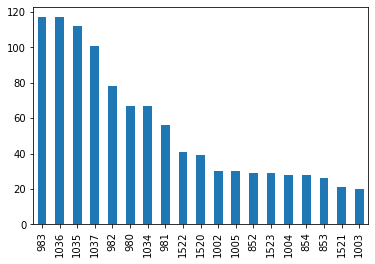

In [ ]:
#Exibindo dados em grafico de Barras
data['LojaID'].value_counts(ascending=False).plot.bar()

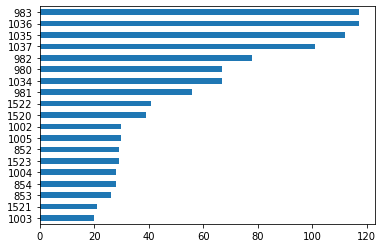

In [ ]:
#Exibindo o grafico trocando o eixo x por y e y por x.
data['LojaID'].value_counts(ascending=True).plot.barh()

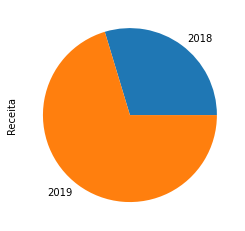

In [ ]:
#Exibindo o grafico de pizza para receita dos anos.
data.groupby(data['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
#Filtro vendas por cidade
data['Cidade'].value_counts()

Recife       284
Salvador     240
Natal        240
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

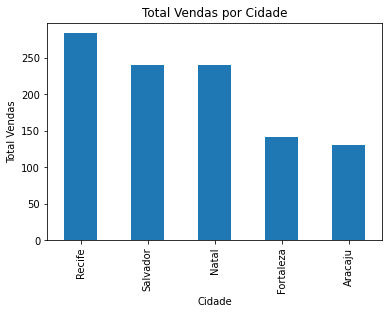

In [ ]:
#Adicionando um title e modificando o label de x e y

import matplotlib.pyplot as plt
data['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

Text(0, 0.5, 'Total Vendas')

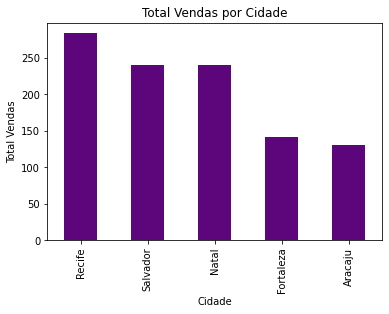

In [ ]:
#Alterando a cor do grafico
data['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color="#5d067b")
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [ ]:
#Alterando o estilo

plt.style.use['ggplot']

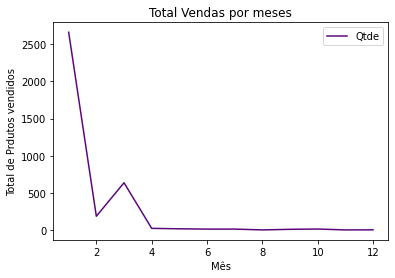

In [ ]:
data.groupby(data['Mês'])['Qtde'].sum().plot(title='Total Vendas por meses', color="#5d067b")
plt.xlabel('Mês')
plt.ylabel('Total de Prdutos vendidos');
plt.legend()


In [ ]:
#Visualição de vendas por mês.
data.groupby(data['Mês'])['Qtde'].sum()

Mês
1     2663
2      186
3      637
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Filtro das vendas do ano de 2019
data_2019 = data[data['Ano'] == 2019]

In [ ]:
#Exibindo amostra
data_2019.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mês,Dia,Data_diff,Trimestre
221,Salvador,2019-01-02,142.23,1035,2,284.46,2019,1,2,366 days,1
99,Recife,2019-01-01,136.72,980,4,546.88,2019,1,1,365 days,1
38,Salvador,2019-01-01,165.34,1034,3,496.02,2019,1,1,365 days,1
82,Recife,2019-01-01,29.55,981,6,177.30,2019,1,1,365 days,1
163,Natal,2019-01-02,17.66,1036,3,52.98,2019,1,2,366 days,1
216,Salvador,2019-01-02,5.82,1035,1,5.82,2019,1,2,366 days,1
154,Salvador,2019-01-02,9.58,1037,1,9.58,2019,1,2,366 days,1
106,Recife,2019-01-01,30.46,982,3,91.38,2019,1,1,365 days,1
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days,1
9,Fortaleza,2019-01-01,11.17,1002,6,67.02,2019,1,1,365 days,1


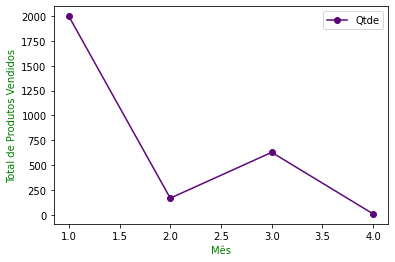

In [ ]:
#Total de produtos vendidos por mês
data_2019.groupby(data_2019['Mês'])['Qtde'].sum().plot(marker = 'o', color="#5d067b")
plt.xlabel('Mês', color="green")
plt.ylabel('Total de Produtos Vendidos', color="green")
plt.legend();


(array([189., 184., 217.,   0.,  74.,  57.,   0.,  66.,  49.,  35.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

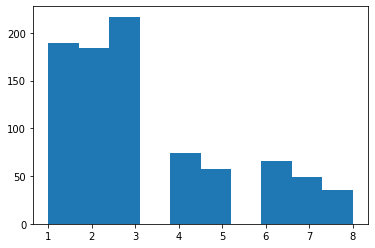

In [ ]:
#Exibindo um Histograma
plt.hist(data_2019['Qtde'])

Text(0, 0.5, 'Receita')

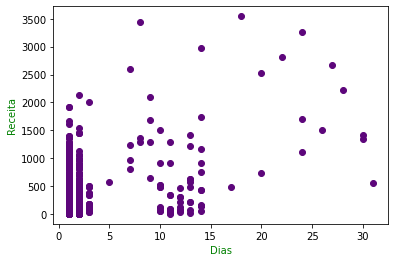

In [ ]:
plt.scatter(x=data_2019['Dia'], y=data_2019['Receita'],color="#5d067b")
plt.xlabel('Dias', color="green")
plt.ylabel('Receita', color="green")


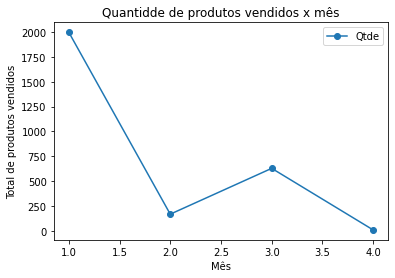

In [ ]:
#Saving file as png
data_2019.groupby(data_2019['Mês'])['Qtde'].sum().plot(marker='o')
plt.title('Quantidde de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()
plt.savefig('Grafico Mes x Qtde.png')